Three dimensional time independent schrodinger equation:

$$
\frac{-\hbar^{2}}{2m}\nabla^{2}\Psi+U(x,y,z)\Psi(x,y,z)=E\Psi(x,y,z)
$$
$$
\nabla^{2}\Psi = \frac{\partial^{2}\Psi}{\partial x^{2}}+\frac{\partial^{2}\Psi}{\partial y^{2}}+\frac{\partial^{2}\Psi}{\partial z^{2}}
$$

Code from: https://www.researchgate.net/publication/357203546_Solving_3D_Time_Independent_Schrodinger_Equation_Using_Numerical_Method

In [1]:
import time
import numpy as np
from scipy import constants
from scipy import sparse
import matplotlib.pyplot as plt

In [2]:
timings = []
definitions = []
for i in range(1,21):
    definitions.append(5 * i)
L = 10

In [3]:
for N in definitions:
    start_time = time.time()

    X,Y,Z = np.meshgrid(np.linspace(-L/2,L/2,N,dtype=float),
                       np.linspace(-L/2,L/2,N,dtype=float),
                       np.linspace(-L/2,L/2,N,dtype=float))
    
    diag = np.ones([N])
    diags = np.array([diag, -2*diag, diag])

    D = sparse.spdiags(diags,np.array([-1,0,1]),N,N)
    I = np.identity(N)
    D1 = sparse.kronsum(D,D)
    D2 = sparse.kronsum(D1,D)

    T = -1/2 * D2
    V = -8.99e9 * ((constants.elementary_charge**2)/constants.physical_constants['Bohr radius'][0])
    V = V * np.ones([N,N,N])
    U = sparse.diags(V.reshape(N**3),(0))
    H = U + T

    eigenvalues, eigenvectors = sparse.linalg.eigsh(H, k=int(round(N/1.5,0)),which='SM')

    end_time = time.time()
    timings.append(end_time - start_time)

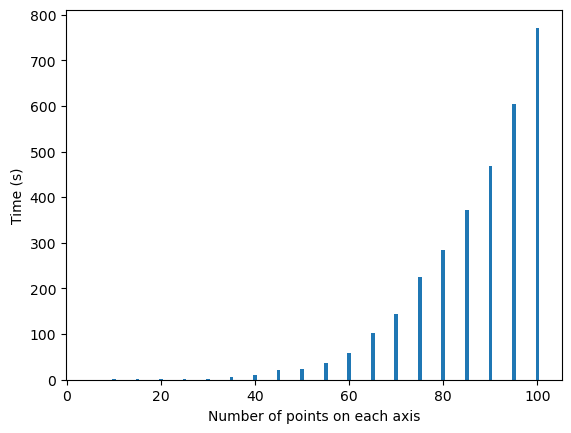

In [5]:
plt.bar(definitions, timings)

plt.xlabel('Number of points on each axis')
plt.ylabel('Time (s)')

plt.show()

In [82]:
def get_e(n):
    return eigenvectors.T[n].reshape((N,N,N))

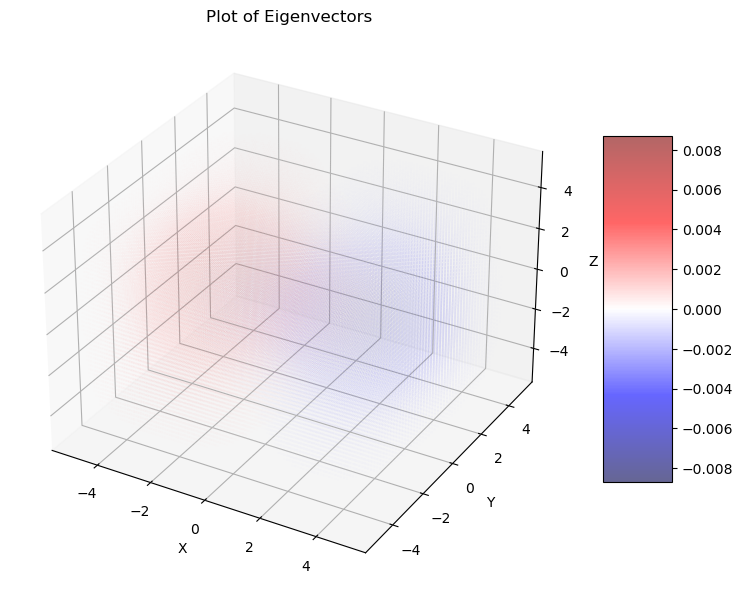

In [83]:
fig = plt.figure(1,figsize=(9,9))
ax = fig.add_subplot(111,projection='3d')
plot1 = ax.scatter3D(X,Y,Z, c=get_e(1),cmap=plt.cm.seismic,s=0.001,alpha=0.6,antialiased=True)
fig.colorbar(plot1,shrink=0.5,aspect=5)
ax.set_xlabel(r'X')
ax.set_ylabel(r'Y')
ax.set_zlabel(r'Z')
ax.set_title('Plot of Eigenvectors')
plt.show()

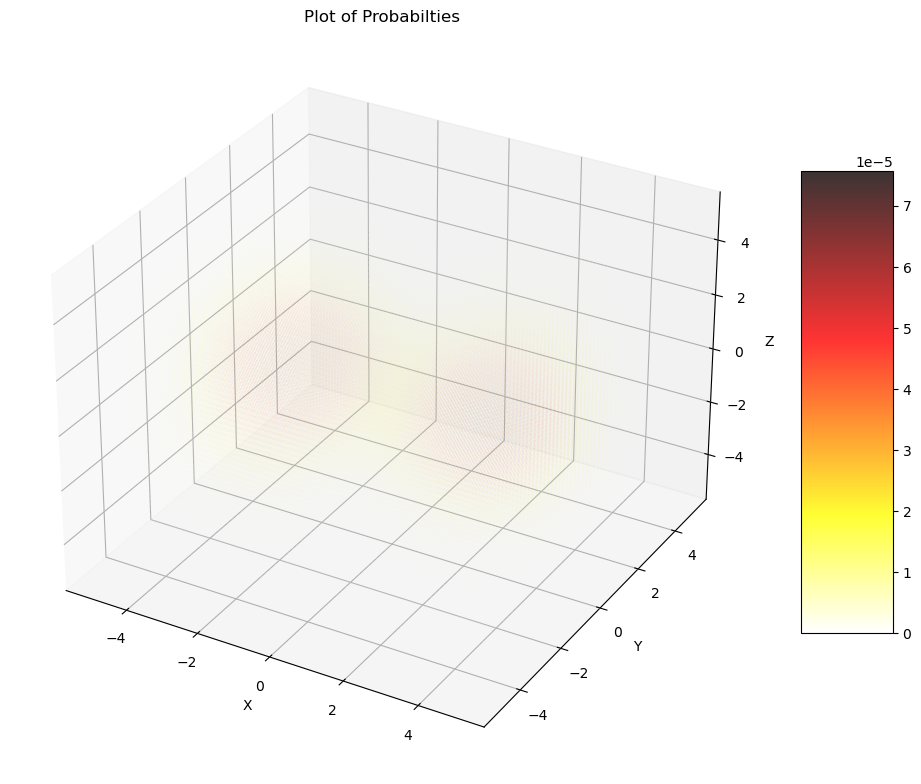

In [84]:
fig = plt.figure(2,figsize=(12,12))
ax = fig.add_subplot(111,projection='3d')
plot2 = ax.scatter3D(X,Y,Z,c=(get_e(1)**2),cmap=plt.cm.hot_r,s=0.001,alpha=0.8,antialiased=True)
fig.colorbar(plot2,shrink=0.5,aspect=5)
ax.set_xlabel(r'X')
ax.set_ylabel(r'Y')
ax.set_zlabel(r'Z')
ax.set_title('Plot of Probabilties')
plt.show()